In [34]:
fn1 = "Raphaël"
ln1 = "Teboul"
filename = "_".join(map(lambda s: s.strip().lower(),
["SD204_lab1", ln1, fn1])) + ".ipynb"

**Exercice1**

In [2]:
import sys
from os import path
import pandas as pd
import urllib.request
import zipfile
import numpy as np

# download part if needed.
url = u'https://archive.ics.uci.edu/ml/machine-learning-databases/00235/'
filename ='household_power_consumption'
zipfilename = filename +'.zip'
Location = url + zipfilename

# testing existence of file:
if sys.version_info >= (3, 0):
    if not(path.isfile('zipfilename')):
        urllib.request.urlretrieve(Location, zipfilename)
else:
    if not(path.isfile('zipfilename')):
        urllib.urlretrieve(Location, zipfilename)
        
# unzip part
zip = zipfile.ZipFile(zipfilename)
zip.extractall()

# Detect and count lines with missing values.
na_values = ['?', '']
fields = ['Date', 'Time', 'Global_active_power', 'Sub_metering_1']

df = pd.read_csv(filename +'.txt', sep=';', nrows=200000,
                na_values=na_values, usecols=fields)

** Exercice 1**

*1)*

In [3]:
df.isnull().sum()


Date                      0
Time                      0
Global_active_power    3732
Sub_metering_1         3732
dtype: int64

There is 3732 rows where Global_active_power or Sub_metering_1 are missing. We now remove them.

In [4]:
df.dropna()

,Date,Time,Global_active_power,Sub_metering_1
0,16/12/2006,17:24:00,4.216,0.0
1,16/12/2006,17:25:00,5.360,0.0
2,16/12/2006,17:26:00,5.374,0.0
3,16/12/2006,17:27:00,5.388,0.0
4,16/12/2006,17:28:00,3.666,0.0
5,16/12/2006,17:29:00,3.520,0.0
6,16/12/2006,17:30:00,3.702,0.0
7,16/12/2006,17:31:00,3.700,0.0
8,16/12/2006,17:32:00,3.668,0.0
9,16/12/2006,17:33:00,3.662,0.0


*2)* global_active_power is in kilowatt, sub_metering_1 is watt-hour, so we need to do :

In [5]:
df["Sub_metering_1"] = df["Sub_metering_1"]*60./1000.

*3)*

In [6]:
df['timestamp']  = pd.to_datetime(df["Date"] + " " +
                            df["Time"], format= '%d/%m/%Y %H:%M:%S')
df=df.set_index('timestamp')

*4)*

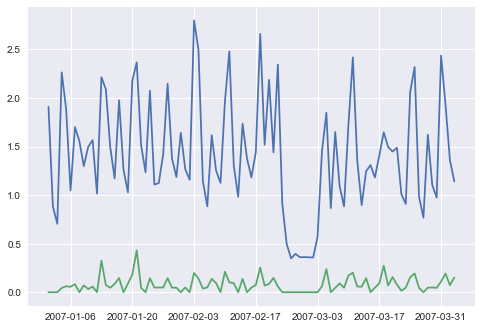

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)


dfavg=df.groupby(pd.TimeGrouper('D')).mean()
dfavg=dfavg['2007/01/01':'2007/04/03']

plt.plot(dfavg)
plt.show()

In [8]:
dfavg.describe()

,Global_active_power,Sub_metering_1
count,93.000000,93.000000
mean,1.424460,0.078319
std,0.573180,0.080942
min,0.348431,0.000000
25%,1.047485,0.000000
50%,1.376850,0.055667
75%,1.735189,0.109167
max,2.798418,0.431083


The cosumption behavior between Feb 23 and March 3 might be the consequence of something broken in the electrical network. Or simply an absence of the owners for a vacation !

*5)*

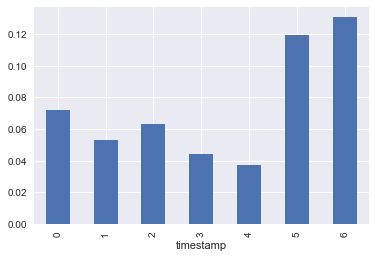

In [9]:
% matplotlib inline

df = df.reset_index()
df = df.groupby(df['timestamp'].dt.dayofweek).mean()
df.loc[:, "Sub_metering_1"].plot(kind = 'bar')

There is a smaller consumption during the week then the the weekend.

*6)*

In [10]:
# Download part part if needed 
filename = "TG_STAID011249.txt"
Location = u'http://josephsalmon.eu/enseignement/TELECOM/MDI720/datasets/' + filename

# Testing existence of file
if sys.version_info >= (3,0):
    if not(path.isfile(filename)):
        urllib.request.urlretrieve(Location, filename)
else: 
    if not(path.isfile(filename)):
        urllib.urlretrieve(Location, filename)
        
# Detect and count lines with missing values
na_values = ["-9999"]
df2 = pd.read_csv(filename, sep=',', nrows=200000,
                 na_values=na_values, header=20, names = ["DATE", "TG"], usecols = [2,3])

# Removing NaN
df2 = df2.dropna(how='any')

# Deviding temperature by 10
df['TG'] = df2['TG']/10

*7)*

In [11]:
df2['Timestamp'] = pd.to_datetime(df2["Date"], format="%Y%m%d")
df2 = df2.set_index('Timestamp')

df.loc["2007-01-01 00:00:00" : "2007-04-30 23:59:59", "Global_active_power"].plot()
df2.loc["2007-01-01" : "2007-04-30", "TG"].plot()


KeyError: 'Date'

In [12]:
df.loc["2007-01-01 00:00:00" : "2007-04-30 23:59:59", "Global_active_power"].plot()
df2.loc["2007-01-01" : "2007-04-30", "TG"].plot()

TypeError: Empty 'DataFrame': no numeric data to plot

-- Giving up on 7) --

** Exercice 2 **

*8)*

In [19]:
#download part if needed.
url = u'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original'
filename = 'auto-mpg.data-original'
Location = url

#testing existence of file:
if sys.version_info >= (3, 0):
    if not(path.isfile('filename')):
        urllib.request.urlretrieve(Location, filename)
else:
    if not(path.isfile('filename')):
        urllib.urlretrieve(Location, filename)
        
#Detect and count lines with missing values.
na_values = ['NA']
fields = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year','origin','car name']
df3 = pd.read_csv(filename, sep=r"\s+", nrows=398,
                na_values=na_values, names=fields)

In [20]:
df3 = df3.dropna(how='any')

*9)*

In [21]:
def decode(n):
    if n==1. :
        return("USA")
    elif n==2. :
        return("Europe")
    else :
        return("Japan")
    
df3['origin']=df3['origin'].apply(decode)

In [22]:
df3

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,USA,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,USA,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,USA,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,USA,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,USA,ford torino
5,15.0,8.0,429.0,198.0,4341.0,10.0,70.0,USA,ford galaxie 500
6,14.0,8.0,454.0,220.0,4354.0,9.0,70.0,USA,chevrolet impala
7,14.0,8.0,440.0,215.0,4312.0,8.5,70.0,USA,plymouth fury iii
8,14.0,8.0,455.0,225.0,4425.0,10.0,70.0,USA,pontiac catalina
9,15.0,8.0,390.0,190.0,3850.0,8.5,70.0,USA,amc ambassador dpl


*10)*

In [28]:
import statsmodels.formula.api as sm

form = "mpg ~ cylinders + displacement + horsepower + weight + acceleration + model_year"
result = sm.ols(formula=form, data=df3.loc[:8]).fit()
result.summary()


/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     6.557
Date:                Wed, 06 Dec 2017   Prob (F-statistic):             0.0479
Time:                        18:32:50   Log-Likelihood:                -7.6914
No. Observations:                   9   AIC:                             25.38
Df Residuals:                       4   BIC:                             26.37
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0062      0.002      2.905      0.044       0.000       0.012
cylinders        0.0496      0.017      2.905      0.044       0.002       0.097
displacement     0.0541      0.064      0.841      0.448      -0.124       0.233
horsepower      -0.0945      0.055     -1.717      0.161      -0.247       0.058
weight          -0.0042      0.007     -0.650      0.551      -0.022       0.014
acceleration    -0.1994      0.442     -0.451      0.676      -1.428       1.029
model_year       0.4338      0.149      2.905      0.044       0.019       0.848
==============================================================================
Omnibus:                        1.051   Durbin-Watson:                   2.904
Prob(Omnibus):                  0.591   Jarque-Bera (JB):                0.076
Skew:                          -0.226   Prob(JB):                        0.962
Kurtosis:                       3.012   Cond. No.                     2.38e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.44e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

We observe for cylinders and model year t is very high and P is very low. This is why they are usefull to predcit mpg.

*11)*

In [29]:
temp = df3[['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year']]
df_norm = (temp - temp.mean()) / (temp.max() - temp.min())
form = "mpg ~ cylinders + displacement + horsepower + weight + acceleration + model_year"
resultAll = sm.ols(formula=form, data=df_norm).fit()
resultAll.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     264.6
Date:                Wed, 06 Dec 2017   Prob (F-statistic):          8.53e-132
Time:                        18:32:56   Log-Likelihood:                 379.26
No. Observations:                 384   AIC:                            -744.5
Df Residuals:                     377   BIC:                            -716.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.017e-16      0.005  -2.19e-14      1.000      -0.009       0.009
cylinders       -0.0449      0.045     -1.009      0.313      -0.132       0.043
displacement     0.0670      0.076      0.885      0.377      -0.082       0.216
horsepower      -0.0173      0.068     -0.255      0.799      -0.151       0.116
weight          -0.6160      0.063     -9.761      0.000      -0.740      -0.492
acceleration     0.0167      0.047      0.354      0.723      -0.076       0.109
model_year       0.2363      0.017     13.792      0.000       0.203       0.270
==============================================================================
Omnibus:                       39.990   Durbin-Watson:                   1.182
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.257
Skew:                           0.648   Prob(JB):                     2.49e-15
Kurtosis:                       4.588   Cond. No.                         19.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Model year explain best the gasoline consumption according to the model with a t ~ 14 as for the others it is really close to zero.

*12)*

In [30]:
RNorm = np.linalg.norm(resultAll.resid)

print(RNorm)

yBar = df_norm['mpg'].mean()
l = np.linalg.norm(df_norm['mpg'].apply(lambda x: x-yBar))
r = np.linalg.norm(resultAll.fittedvalues - yBar)

print(np.isclose(l**2, RNorm**2 + r**2))

1.76600579437
True


*13)*

In [33]:
dfRow = pd.DataFrame([[0, 6, 225, 100, 3233, 15.4, 101, 1, ""]],
                     columns=["mpg", "cylinders", "displacement", 
                              "horsepower", "weight", "acceleration", 
                              "model_year", "origin", "car_name"])
df3.append(dfRow)

formula = "mpg ~ cylinders + displacement + horsepower + weight + acceleration + model_year"

result = sm.ols(formula=formula, data=df3).fit()

result.fittedvalues[397]

28.820102996732864

We hereby predict 28.8 of consumption for this model.